# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [166]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from selenium.webdriver.chrome.service import Service
import os
import datetime

In [167]:
driver_path = os.path.join(os.path.expanduser("~"), "/Boot_Camp/", "Chrome_Driver", "chromedriver.exe")
browser = Browser('chrome',service=Service(executable_path=driver_path))


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [168]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [169]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')

In [170]:
# Extract all rows of data
table = html_soup.find(class_='table')
table_rows = table.find_all('tr')
len(table_rows)

1868

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [171]:
# Create an empty list
complete_table=[]
table_header = []
for tx in table_rows:
    th=tx.find_all('th')
    head=[tx.text for tx in th]
    table_header.append(head)
top = table_header[0]
complete_table.append(top)
#Loop through the scraped data to create a list of rows
for tr in table_rows:
    td=tr.find_all('td')
    row= [tr.text for tr in td]
    complete_table.append(row)
complete_table.pop(1)  
len(complete_table)

1868

In [172]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
table_df = pd.DataFrame(complete_table)
table_df

,0,1,2,3,4,5,6
0,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


In [173]:
# Confirm DataFrame was created successfully
new_header = complete_table[0]
new_header
table_df=table_df[1:]
table_df.columns=new_header
table_df = table_df.rename(
    columns={"terrestrial_date":"date"})
table_df

,id,date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [174]:
# Examine data type of each column
table_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 1 to 1867
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1867 non-null   object
 1   date      1867 non-null   object
 2   sol       1867 non-null   object
 3   ls        1867 non-null   object
 4   month     1867 non-null   object
 5   min_temp  1867 non-null   object
 6   pressure  1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [175]:
# Change data types for data analysis
# change of data types into numbers
def columns_to_numeric(df, column_list):
    df[column_list]=df[column_list].apply(pd.to_numeric, errors='coerce')
# Change of the object into the date
def columns_to_date (df, column_list):
    df[column_list]=df[column_list].apply(pd.to_datetime, errors='coerce')
# Apply the changes on the data frame
columns_to_numeric(table_df, ['id', 'sol', 'ls', 'month', 'min_temp', 'pressure'])
columns_to_date(table_df, ['date'])    


In [176]:
# Confirm type changes were successful by examining data types again
table_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 1 to 1867
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        1867 non-null   int64         
 1   date      1867 non-null   datetime64[ns]
 2   sol       1867 non-null   int64         
 3   ls        1867 non-null   int64         
 4   month     1867 non-null   int64         
 5   min_temp  1867 non-null   float64       
 6   pressure  1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [177]:
table_df

,id,date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


In [178]:
# 1. How many months are there on Mars?
mars_month = table_df.month.nunique()
mars_month

12

In [179]:
# 2. How many Martian days' worth of data are there?
mars_sols = table_df.sol.nunique()
mars_sols

1867

In [180]:
# 3. What is the average low temperature by month?
monthly_avg = table_df.groupby(["month"]).mean()
monthly_avg

C:\Users\user\AppData\Local\Temp\ipykernel_20832\1912350701.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_avg = table_df.groupby(["month"]).mean()


,id,sol,ls,min_temp,pressure
month,,,,,
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
6,735.306122,750.829932,164.897959,-75.299320,745.054422
7,714.549296,715.105634,194.894366,-72.281690,795.105634
8,718.078014,795.333333,224.347518,-68.382979,873.829787
9,785.843284,861.186567,254.052239,-69.171642,913.305970


Text(0.5, 0, 'Martian Months')

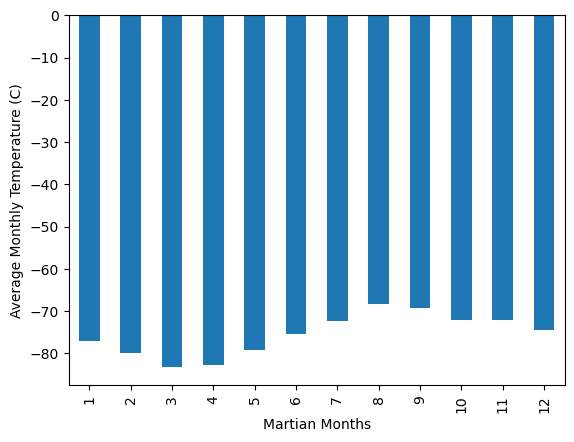

In [181]:
# Plot the average temperature by month
monthly_avg.min_temp.plot.bar()
plt.ylabel('Average Monthly Temperature (C)')
plt.xlabel('Martian Months')


In [182]:
# Identify the coldest and hottest months in Curiosity's location
minimum_temp = monthly_avg.min_temp.min()
maximum_temp = monthly_avg.min_temp.max()
print(f"The minimum average temperature is {str(round(minimum_temp,3))}.")
print(f"The maximum average temperature is {str(round(maximum_temp,3))}.")


The minimum average temperature is -83.307.
The maximum average temperature is -68.383.


In [183]:
# 4. Average pressure by Martian month
monthly_avg = table_df.groupby(["month"]).mean()
monthly_avg


C:\Users\user\AppData\Local\Temp\ipykernel_20832\759602214.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_avg = table_df.groupby(["month"]).mean()


,id,sol,ls,min_temp,pressure
month,,,,,
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
6,735.306122,750.829932,164.897959,-75.299320,745.054422
7,714.549296,715.105634,194.894366,-72.281690,795.105634
8,718.078014,795.333333,224.347518,-68.382979,873.829787
9,785.843284,861.186567,254.052239,-69.171642,913.305970


Text(0.5, 0, 'Martian Months')

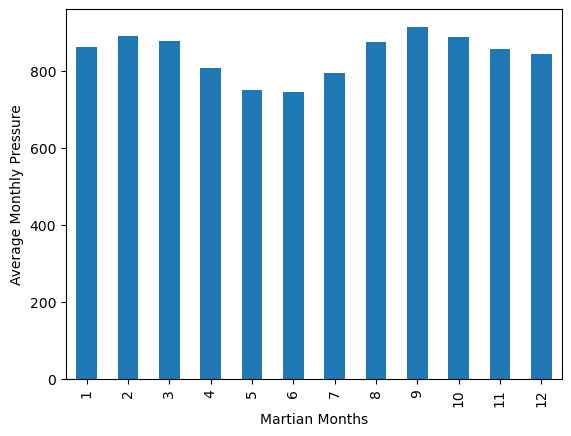

In [184]:
# Plot the average pressure by month
monthly_avg.pressure.plot.bar()
plt.ylabel('Average Monthly Pressure')
plt.xlabel('Martian Months')

In [185]:
latest_date = table_df.date.max()
latest_date

Timestamp('2018-02-27 00:00:00')

In [186]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# First of all, the last date of sampling is determined first and corresponding solar longitude is selected
latest_date = table_df.date.max()
row = table_df.loc[table_df.date == latest_date]
longitude = row.iloc[0,3]
longitude
# Using the longtitude determined from top, the dates when the same longtitude exists are selected
longitude_2 = table_df.loc[table_df.ls == longitude]
longitude_2


,id,date,sol,ls,month,min_temp,pressure
560,581,2014-05-24,639,135,5,-80.0,750.0
561,583,2014-05-25,640,135,5,-81.0,750.0
1212,1237,2016-04-11,1308,135,5,-81.0,748.0
1213,1238,2016-04-12,1309,135,5,-81.0,747.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0
1867,1895,2018-02-27,1977,135,5,-77.0,727.0


In [187]:
col_list = list(longitude_2['date'])
col_list
diff_1=col_list[3]-col_list[1]
diff_2=col_list[2]-col_list[0]
diff_3=col_list[4]-col_list[2]
diff_3
print(f"The calculated number of terrestrial days for each Martian year is {diff_1}, {diff_2} and {diff_3}.")

The calculated number of terrestrial days for each Martian year is 688 days 00:00:00, 688 days 00:00:00 and 686 days 00:00:00.


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [188]:
# Write the data to a CSV
table_df.to_csv('mars_data.csv')

In [189]:
browser.quit()